### Data Input

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

header_list = ["SepalLengthInCM", "SepalWidth", "PetalLengthInCM", "PetalWidthInCM", "class"]

df = pd.read_csv("../dataset/iris.data", sep=",", names=header_list)

,SepalLengthInCM,SepalWidth,PetalLengthInCM,PetalWidthInCM,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Preprocessing

In [4]:
from sklearn.utils import shuffle

# check missing value and drop the feature
df_null = df.isnull()

for colname in df_null:
    find_null = False
    
    for is_null in df_null[colname]:
        if bool(is_null):
            find_null = True
            break
    
    # if there is missing value in column, we drop this column
    if find_null:
        df = df.drop(colname, 1)

# data shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

#bonus: need implemetation

# Transform to the data format that I can process
mean_dict = {}
std_dict = {}
vf_dict = {} # key: bin name, value: data count

bins = [0, 1, 2, 3, 4, 5,6 ,7 ,8 ,9 ,10]

df['bins'] = pd.cut(df['SepalLengthInCM'], bins)

for colname in df.columns[:len(df.columns)-2]:
    mean_dict[colname] = df[colname].mean()
    std_dict[colname] = df[colname].std()

for ele in df['bins']:
    if str(ele) in vf_dict:
        vf_dict[str(ele)] += 1
    else:
        vf_dict[str(ele)] = 1

<ipython-input-4-1ca7ed67afd1>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bins'] = pd.cut(df['SepalLengthInCM'], bins)


### Data Visualization

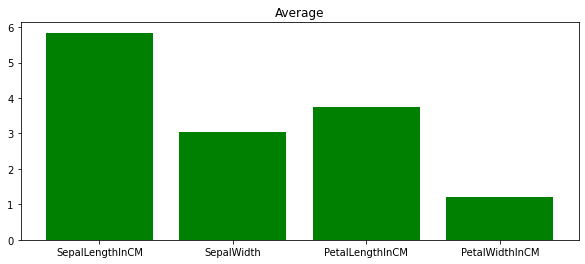

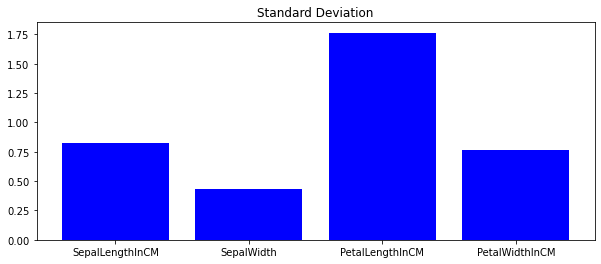

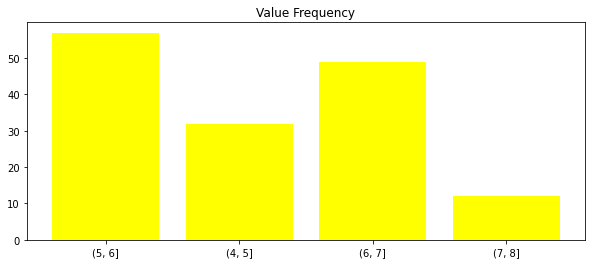

In [5]:
# show data distribution
def draw(title, color, dict_name):
    plt.figure(figsize=(10,4))
    plt.title(title, loc='center')

    plt.bar(range(len(dict_name)), list(dict_name.values()), align='center', color=color)
    plt.xticks(range(len(dict_name)), list(dict_name.keys()))
    plt.show()


draw("Average", "green", mean_dict)
draw("Standard Deviation", "blue", std_dict)
draw("Value Frequency", "yellow", vf_dict)

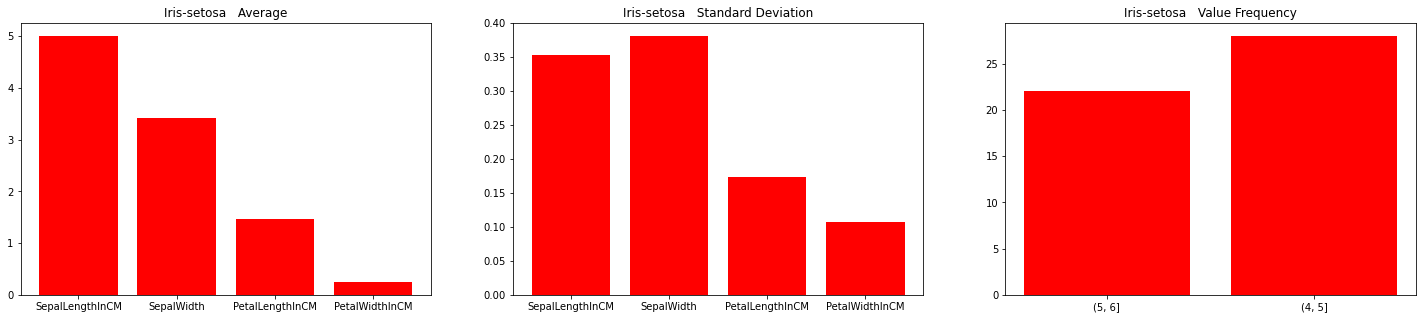

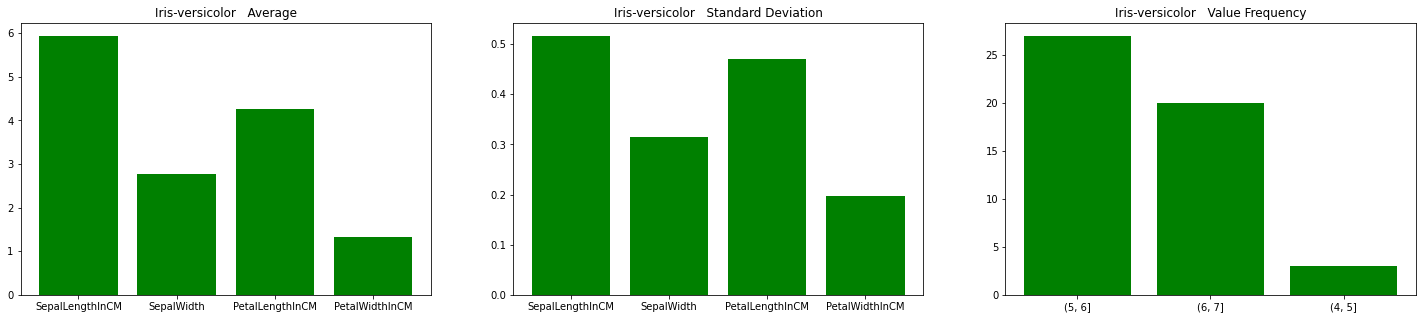

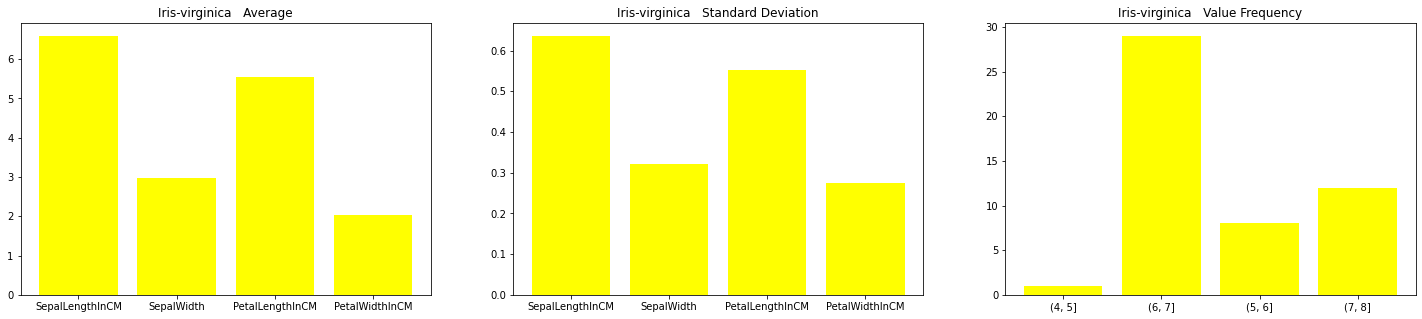

In [21]:
# show data distribution base on target
def calculate_and_draw(df_input, color_input, cata_title): 
    mean_dict = {}
    std_dict = {}
    vf_dict = {} # key: bin name, value: data count

    for colname in df_input.columns[:len(df_input.columns)-2]:
        mean_dict[colname] = df_input[colname].mean()
        std_dict[colname] = df_input[colname].std()

    for ele in df_input['bins']:
        if str(ele) in vf_dict:
            vf_dict[str(ele)] += 1
        else:
            vf_dict[str(ele)] = 1
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
    ax1.set_title(cata_title + "   Average")
    ax2.set_title(cata_title + "   Standard Deviation")
    ax3.set_title(cata_title + "   Value Frequency")
    ax1.bar(mean_dict.keys(), mean_dict.values(), color=color_input)
    ax2.bar(std_dict.keys(), std_dict.values(), color=color_input)
    ax3.bar(vf_dict.keys(), vf_dict.values(), color=color_input)
    



grouped = df.groupby(df["class"])
setosa_df = grouped.get_group("Iris-setosa")
versicolor_df = grouped.get_group("Iris-versicolor")
virginica_df = grouped.get_group("Iris-virginica")

calculate_and_draw(setosa_df, "red", "Iris-setosa")
calculate_and_draw(versicolor_df, "green", "Iris-versicolor")
calculate_and_draw(virginica_df, "yellow", "Iris-virginica")


### Model Implementation

In [7]:
from sklearn.naive_bayes import GaussianNB

def gaussianNB_constructer(training_df):
    training_vector = []
    target_values = []
    
    for index, row in training_df.iterrows():
        target_values.append(row["class"])
        training_vector.append([row["SepalLengthInCM"], row["SepalWidth"], row["PetalLengthInCM"], row["PetalWidthInCM"]])
    
    clf = GaussianNB()
    clf.fit(training_vector, target_values)
    
    return clf
    
def testing(clf, to_be_predict):
    return clf.predict([to_be_predict])

### Train-Test-Split Holdout Validation

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

training_dataframe = df.iloc[:105, :]
testing_dataframe = df.iloc[105:, :]

result = []
answer = []

clf = gaussianNB_constructer(training_dataframe)

for index, row in testing_dataframe.iterrows():
    to_be_predict = [row["SepalLengthInCM"], row["SepalWidth"], row["PetalLengthInCM"], row["PetalWidthInCM"]]
    result.append(testing(clf, to_be_predict))
    answer.append(row["class"])

# get confusion matrix    
output_confusion_matrix = confusion_matrix(answer, result)

# get accuracy
output_accuracy = accuracy_score(answer, result)

#get recall
output_recall = recall_score(answer, result, average='macro')

# get precision
output_precision = precision_score(answer, result, average='macro')

### Train Test Splits - K-fold Cross-validation

In [9]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)

confusion_matrix_list = []
accuracy_list = []
recall_list = []
precision_list = []

for train_index, test_index in kf.split(df):
    clf = gaussianNB_constructer(df.iloc[train_index])
    
    answer = []
    result = []
    
    for index, row in df.iloc[test_index].iterrows():
        to_be_predict = [row["SepalLengthInCM"], row["SepalWidth"], row["PetalLengthInCM"], row["PetalWidthInCM"]]
        result.append(testing(clf, to_be_predict))
        answer.append(row["class"])
    
    confusion_matrix_list.append(confusion_matrix(answer, result))
    accuracy_list.append(accuracy_score(answer, result))
    recall_list.append(recall_score(answer, result, average='macro'))
    precision_list.append(precision_score(answer, result, average='macro'))


    
final_confusion_matrix = np.add(confusion_matrix_list[0], confusion_matrix_list[1])
final_confusion_matrix = np.add(final_confusion_matrix, confusion_matrix_list[2])

final_confusion_matrix = [[float(y) for y in x] for x in final_confusion_matrix]

for i in range(len(final_confusion_matrix)):
    for j in range(len(final_confusion_matrix[i])):
        final_confusion_matrix[i][j] = float(final_confusion_matrix[i][j] / 3.0)

final_confusion_matrix = np.array(final_confusion_matrix)
final_accuracy = sum(accuracy_list) / 3
final_recall = sum(recall_list) / 3
final_precision = sum(precision_list) / 3

### Result print

In [10]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Test Type", "Confusion Matrix", "Accuracy", "Recall", "Precision"]
x.add_row(["Holdout Validation", output_confusion_matrix, output_accuracy, output_recall, output_precision])
x.add_row(["K-fold Cross-validation", final_confusion_matrix, final_accuracy, final_recall, final_precision])

print(x)

+-------------------------+-----------------------------------------+--------------------+--------------------+--------------------+
|        Test Type        |             Confusion Matrix            |      Accuracy      |       Recall       |     Precision      |
+-------------------------+-----------------------------------------+--------------------+--------------------+--------------------+
|    Holdout Validation   |               [[12  0  0]               | 0.9555555555555556 | 0.9682539682539683 | 0.9523809523809524 |
|                         |                [ 0 19  2]               |                    |                    |                    |
|                         |                [ 0  0 12]]              |                    |                    |                    |
| K-fold Cross-validation |  [[16.66666667  0.          0.        ] |        0.96        | 0.9601879601879603 | 0.9600181953123129 |
|                         |   [ 0.         15.66666667  1.        ] |

### Question

+-------------------+--------------------------+
|     Mean Value    | Standard Deviation Value |
+-------------------+--------------------------+
| 4.260000000000002 |   0.46991097723995795    |
+-------------------+--------------------------+


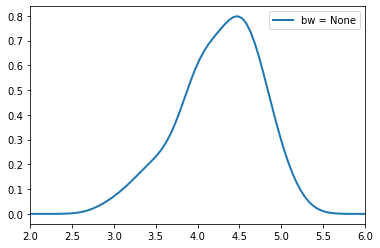

In [19]:
import math
import numpy as np
import scipy.stats

mean_value = versicolor_df["PetalLengthInCM"].mean()
std_value = versicolor_df["PetalLengthInCM"].std()

x1 = PrettyTable()
x1.field_names = ["Mean Value", "Standard Deviation Value"]
x1.add_row([mean_value, std_value])
print(x1)

data = versicolor_df["PetalLengthInCM"]

# test values for the bw_method option ('None' is the default value)
bw_values =  [None]

# generate a list of kde estimators for each bw
kde = [scipy.stats.gaussian_kde(data,bw_method=bw) for bw in bw_values]


# plot (normalized) histogram of the data
import matplotlib.pyplot as plt 


# plot density estimates
t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2, label='bw = '+str(bw))
plt.xlim(2,6)
plt.legend(loc='best')